In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%qtconsole

# notes:
maybe I should fix regularization at 1

In [4]:
%cd /Users/cgu3/Documents/lsc-gnn
%pwd

/Users/cgu3/Documents/lsc-gnn


/Users/cgu3/Documents/lsc-gnn/.venv/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


'/Users/cgu3/Documents/lsc-gnn'

In [5]:
df = pd.read_json('results/results_LSC.json', lines=True)
# df = pd.read_json('results/final_cora_results.json', lines=True)
# df = pd.read_json('results/final_citeseer_results.json', lines=True)

df['target_ratio'] = df['target_ratio'].apply(lambda x: f"{x:.2f}")
df['model_type'] = 'LSCGNN'
df['layer_type'] = 'GAT'


In [6]:
df

,dataset,target_ratio,use_edge_for_predict,layer_type,seed,val_loss,accuracy,learning_rate,regularization,neg_sample_ratio,perturb_rate,num_epochs,execution_time,time_stamp,model_type
0,Cora,0.50,full,GAT,1,1.5623,0.7926,0.005,0,1,0.0,1000,11.66,2025-02-21 16:33:25,LSCGNN
1,Cora,0.50,full,GAT,1,1.2811,0.7815,0.005,1,1,0.0,1000,9.09,2025-02-21 16:33:36,LSCGNN
2,Cora,0.50,full,GAT,1,1.1433,0.8037,0.005,2,1,0.0,1000,9.05,2025-02-21 16:33:47,LSCGNN
3,Cora,0.50,full,GAT,1,1.0938,0.7926,0.005,3,1,0.0,1000,8.96,2025-02-21 16:33:58,LSCGNN
4,Cora,0.50,full,GAT,1,1.1375,0.7926,0.005,4,1,0.0,1000,8.99,2025-02-21 16:34:09,LSCGNN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11335,PubMed,0.90,full,GAT,10,1.3317,0.7684,0.005,16,1,0.3,1000,10.33,2025-02-28 09:37:20,LSCGNN
11336,PubMed,0.90,full,GAT,10,1.2704,0.7670,0.005,17,1,0.3,1000,10.64,2025-02-28 09:37:34,LSCGNN
11337,PubMed,0.90,full,GAT,10,1.3326,0.7540,0.005,18,1,0.3,1000,10.27,2025-02-28 09:37:47,LSCGNN
11338,PubMed,0.90,full,GAT,10,1.2477,0.7501,0.005,19,1,0.3,1000,11.35,2025-02-28 09:38:02,LSCGNN


In [7]:
# calculate mean and std for accuracy group by dataset and target_ratio
df_first = df[df['regularization'] == 0].groupby(['dataset', 'target_ratio', 'perturb_rate']).agg({'accuracy':['mean', 'std']})
df_first = (100 * df_first).round(2)
# flatten the columns
df_first.columns = ['_'.join(col).strip('_') for col in df_first.columns.values]
# create a new column with the name 'GAT_full" using in format of string accuracy_mean +- accuracy_std
df_first['GAT_full'] = df_first['accuracy_mean'].round(2).astype(str) + "±" + df_first['accuracy_std'].round(2).astype(str)
df_first = df_first[['GAT_full']]

In [8]:
# df_best = df.groupby(['dataset', 'seed', 'target_ratio', 'perturb_rate']).apply(lambda x: x.loc[x['val_loss'].idxmin()])[['accuracy', 'regularization']]
# df_best = df_best.reset_index()
# # get average of seed group by dataset, target_ratio and perturb_rate
# df_best = df_best.groupby(['dataset', 'target_ratio', 'perturb_rate']).agg({'regularization':['mean', 'std']})
# df_best

In [9]:
df_best = df.groupby(['dataset', 'seed', 'target_ratio', 'perturb_rate', 'model_type', 'layer_type']).apply(lambda x: x.loc[x['val_loss'].idxmin()], include_groups=False)[['accuracy', 'regularization', 'execution_time']]
# calculate mean and std for accuracy group by dataset and target_ratio
df_best = df_best.groupby(['dataset', 'target_ratio', 'perturb_rate', 'model_type', 'layer_type']).agg({'accuracy':['mean', 'std'], 'execution_time': ['mean']})
df_best['accuracy'] = (100 * df_best['accuracy']).round(2)
# flatten the columns
df_best.columns = ['_'.join(col).strip('_') for col in df_best.columns.values]
# create a new column with the name "LSC-GNN" using in format of string accuracy_mean +- accuracy_std
df_best['mean_std'] = df_best['accuracy_mean'].round(2).astype(str) + "±" + df_best['accuracy_std'].round(2).astype(str)
# df_best.rename(columns={'accuracy_mean': 'With regularizaion'}, inplace=True)
df_best = df_best.reset_index()
df_best

,dataset,target_ratio,perturb_rate,model_type,layer_type,accuracy_mean,accuracy_std,execution_time_mean,mean_std
0,CiteSeer,0.50,0.00,LSCGNN,GAT,70.03,1.07,9.965,70.03±1.07
1,CiteSeer,0.50,0.05,LSCGNN,GAT,71.20,1.50,9.668,71.2±1.5
2,CiteSeer,0.50,0.10,LSCGNN,GAT,70.09,1.03,9.885,70.09±1.03
3,CiteSeer,0.50,0.15,LSCGNN,GAT,69.19,1.21,9.775,69.19±1.21
4,CiteSeer,0.50,0.20,LSCGNN,GAT,69.97,1.16,9.844,69.97±1.16
...,...,...,...,...,...,...,...,...,...
58,PubMed,0.90,0.10,LSCGNN,GAT,84.44,1.08,10.482,84.44±1.08
59,PubMed,0.90,0.15,LSCGNN,GAT,81.76,3.78,10.547,81.76±3.78
60,PubMed,0.90,0.20,LSCGNN,GAT,81.02,2.42,10.569,81.02±2.42
61,PubMed,0.90,0.25,LSCGNN,GAT,79.59,1.96,10.565,79.59±1.96


In [10]:
df_baseline = pd.read_json('results/results_baseline.json', lines=True)
df_baseline['target_ratio'] = df_baseline['target_ratio'].apply(lambda x: f"{x:.2f}")

# calculate mean and std for accuracy group by dataset and target_ratio and use_edge_for_prediction
df_baseline_agg = df_baseline.groupby(['dataset', 'target_ratio', 'perturb_rate',  'model_type', 'layer_type']).agg({'accuracy':['mean', 'std'], 'execution_time': ['mean']})
df_baseline_agg['accuracy'] = (100 * df_baseline_agg['accuracy']).round(2)
# flatten the columns
df_baseline_agg.columns = ['_'.join(col).strip('_') for col in df_baseline_agg.columns.values]
df_baseline_agg['mean_std'] = df_baseline_agg['accuracy_mean'].apply(lambda x: "{:.2f}".format(x)) + "±" + \
                              df_baseline_agg['accuracy_std'].apply(lambda x: "{:.2f}".format(x))

# Reset index so we can pivot properly
df_baseline_agg = df_baseline_agg.reset_index()

df_baseline_agg


,dataset,target_ratio,perturb_rate,model_type,layer_type,accuracy_mean,accuracy_std,execution_time_mean,mean_std
0,CiteSeer,0.50,0.00,LSCGNN,GATConv,68.34,1.48,9.28972,68.34±1.48
1,CiteSeer,0.50,0.00,LSCGNN,GCNConv,69.04,0.83,7.04342,69.04±0.83
2,CiteSeer,0.50,0.00,ProGNN,GCNConv,74.85,0.21,5806.98375,74.85±0.21
3,CiteSeer,0.50,0.05,LSCGNN,GATConv,67.47,1.46,9.27547,67.47±1.46
4,CiteSeer,0.50,0.05,LSCGNN,GCNConv,67.83,1.03,6.98835,67.83±1.03
...,...,...,...,...,...,...,...,...,...
163,PubMed,0.90,0.20,LSCGNN,GCNConv,78.80,0.70,8.67134,78.80±0.70
164,PubMed,0.90,0.25,LSCGNN,GATConv,77.58,0.67,11.01439,77.58±0.67
165,PubMed,0.90,0.25,LSCGNN,GCNConv,78.35,1.12,8.45332,78.35±1.12
166,PubMed,0.90,0.30,LSCGNN,GATConv,77.58,0.65,10.53541,77.58±0.65


# Combine the results from the baseline model run and the LSCGNN

In [11]:
# combine df_first and df_best horizontally
df_combined = pd.concat([df_best, df_baseline_agg], axis=0)
df_combined = df_combined.reset_index(drop=True)
# convert to long format
# df_combined = df_combined.melt(id_vars=['dataset', 'target_ratio', 'perturb_rate'], var_name='model', value_name='accuracy')
df_combined['model'] = df_combined['model_type'] + '_' + df_combined['layer_type']
# mapping value in model to 'LSC-GNN' and 'GAT_full'
df_combined['model'] = df_combined['model'].replace({'LSCGNN_GAT': 'LSCGNN',
                                                     'LSCGNN_GATConv': 'GAT',
                                                     'LSCGNN_GCNConv': 'GCN',
                                                     'ProGNN_GCNConv': 'ProGNN'})
desired_order = ['Cora', 'CiteSeer', 'PubMed']  # Change this as needed
# Reorder dataset
df_combined.loc[:, 'dataset'] = pd.Categorical(df_combined['dataset'], categories=desired_order, ordered=True)

df_combined = df_combined[['dataset', 'target_ratio', 'perturb_rate', 'model', 'accuracy_mean', 'mean_std', 'execution_time_mean']]
df_combined

,dataset,target_ratio,perturb_rate,model,accuracy_mean,mean_std,execution_time_mean
0,CiteSeer,0.50,0.00,LSCGNN,70.03,70.03±1.07,9.96500
1,CiteSeer,0.50,0.05,LSCGNN,71.20,71.2±1.5,9.66800
2,CiteSeer,0.50,0.10,LSCGNN,70.09,70.09±1.03,9.88500
3,CiteSeer,0.50,0.15,LSCGNN,69.19,69.19±1.21,9.77500
4,CiteSeer,0.50,0.20,LSCGNN,69.97,69.97±1.16,9.84400
...,...,...,...,...,...,...,...
226,PubMed,0.90,0.20,GCN,78.80,78.80±0.70,8.67134
227,PubMed,0.90,0.25,GAT,77.58,77.58±0.67,11.01439
228,PubMed,0.90,0.25,GCN,78.35,78.35±1.12,8.45332
229,PubMed,0.90,0.30,GAT,77.58,77.58±0.65,10.53541


In [12]:
 df_combined[(df_combined['target_ratio'] == '0.70') & (df_combined['perturb_rate'] == 0.20)]

,dataset,target_ratio,perturb_rate,model,accuracy_mean,mean_std,execution_time_mean
11,CiteSeer,0.70,0.2,LSCGNN,68.11,68.11±1.27,9.81300
32,Cora,0.70,0.2,LSCGNN,81.24,81.24±2.0,9.51000
53,PubMed,0.70,0.2,LSCGNN,81.21,81.21±1.21,10.21600
96,CiteSeer,0.70,0.2,GAT,62.17,62.17±2.23,9.61968
97,CiteSeer,0.70,0.2,GCN,64.56,64.56±1.77,7.21139
98,CiteSeer,0.70,0.2,ProGNN,64.73,64.73±nan,2994.50710
159,Cora,0.70,0.2,GAT,75.17,75.17±2.17,9.34103
160,Cora,0.70,0.2,GCN,77.52,77.52±1.44,7.11613
161,Cora,0.70,0.2,ProGNN,78.15,78.15±0.53,1490.65546
211,PubMed,0.70,0.2,GAT,78.95,78.95±0.66,11.23346


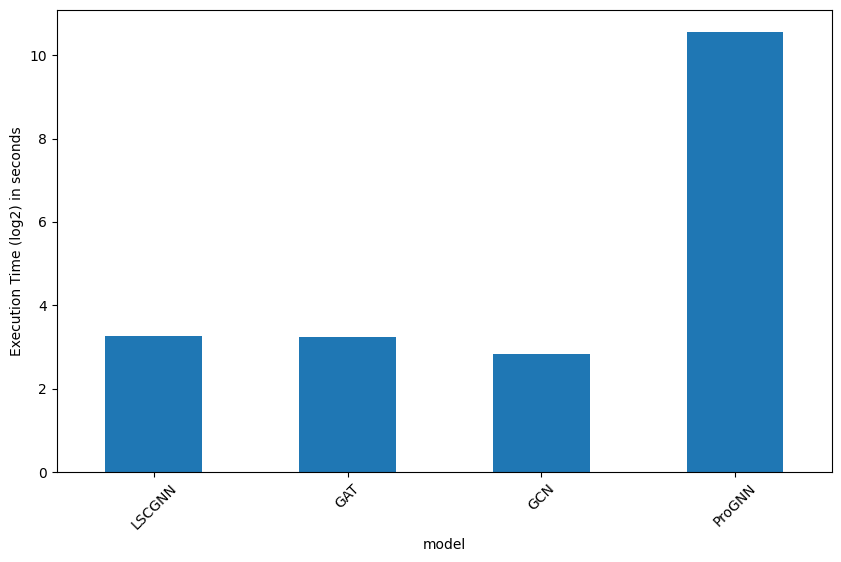

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Filter data
df_plot = df_combined[(df_combined['perturb_rate'] == 0.15) & (df_combined['dataset'] == 'Cora') &
                      (df_combined['target_ratio'] == '0.70')]
df_plot.loc[:,'execution_time_mean'] = np.log2(df_plot['execution_time_mean'])
# Plot bar chart
fig, ax = plt.subplots(figsize=(10, 6))
df_plot.set_index('model')['execution_time_mean'].plot(kind='bar', ax=ax)
# rotation of x-axis labels
plt.xticks(rotation=45)
ax.set_ylabel('Execution Time (log2) in seconds')
plt.show()


In [305]:
def bold_max_in_group(df, group_cols, value_col, target_col):
    df = df.copy()

    # Find the max accuracy_mean per group
    max_idx = df.groupby(group_cols)[value_col].idxmax()

    # Apply bold formatting to mean_std for the max values
    df.loc[max_idx, target_col] = df.loc[max_idx, target_col].apply(lambda x: f"\\textbf{{{x}}}")

    return df


In [306]:
group_cols = ['dataset', 'target_ratio', 'perturb_rate']
value_col = 'accuracy_mean'
target_col = 'mean_std'

df_combined = bold_max_in_group(df_combined, group_cols, value_col, target_col)
df_combined


,dataset,target_ratio,perturb_rate,model,accuracy_mean,mean_std,execution_time_mean
0,CiteSeer,0.50,0.00,LSCGNN,70.03,70.03±1.07,9.96500
1,CiteSeer,0.50,0.05,LSCGNN,71.20,71.2±1.5,9.66800
2,CiteSeer,0.50,0.10,LSCGNN,70.09,70.09±1.03,9.88500
3,CiteSeer,0.50,0.15,LSCGNN,69.19,\textbf{69.19±1.21},9.77500
4,CiteSeer,0.50,0.20,LSCGNN,69.97,\textbf{69.97±1.16},9.84400
...,...,...,...,...,...,...,...
226,PubMed,0.90,0.20,GCN,78.80,78.80±0.70,8.67134
227,PubMed,0.90,0.25,GAT,77.58,77.58±0.67,11.01439
228,PubMed,0.90,0.25,GCN,78.35,78.35±1.12,8.45332
229,PubMed,0.90,0.30,GAT,77.58,77.58±0.65,10.53541


In [317]:
import pandas as pd

# Define desired order for multi-index levels
desired_target_ratio_order = ['0.50', '0.70', '0.90']
desired_dataset_order = ['Cora', 'CiteSeer', 'PubMed']
desired_model_order = ['GCN', 'GAT', 'ProGNN', 'LSCGNN']  # Customize as needed

# Ensure categorical ordering before pivoting
df_combined["target_ratio"] = pd.Categorical(df_combined["target_ratio"], categories=desired_target_ratio_order, ordered=True)
df_combined["dataset"] = pd.Categorical(df_combined["dataset"], categories=desired_dataset_order, ordered=True)
df_combined["model"] = pd.Categorical(df_combined["model"], categories=desired_model_order, ordered=True)

# Pivot the table to match the requested format
df_transformed = df_combined.pivot(index=["target_ratio", "dataset", "model"], columns="perturb_rate", values=["mean_std"])

# Flatten column names for readability
df_transformed.columns = [f"{round(col[1], 2)}" for col in df_transformed.columns]
df_transformed.index.names = ['Ratio', 'Dataset', 'Model']

# Sort by the custom order
df_transformed = df_transformed.sort_index(level=['Ratio', 'Dataset', 'Model'])
df_transformed


0.0                 0.05  \
Ratio Dataset  Model                                              
0.50  Cora     GCN              79.11±1.59           78.22±2.04   
               GAT              79.26±1.31           76.63±1.47   
               ProGNN  \textbf{81.52±0.32}  \textbf{82.44±0.70}   
               LSCGNN            78.0±1.47           77.85±1.38   
      CiteSeer GCN              69.04±0.83           67.83±1.03   
               GAT              68.34±1.48           67.47±1.46   
               ProGNN  \textbf{74.85±0.21}   \textbf{73.49±nan}   
               LSCGNN           70.03±1.07             71.2±1.5   
      PubMed   GCN              83.74±0.58           81.55±0.63   
               GAT              83.65±1.06           81.84±0.95   
               LSCGNN  \textbf{85.93±0.42}  \textbf{84.63±0.51}   
0.70  Cora     GCN              82.64±0.59           81.14±1.28   
               GAT              82.72±1.21           80.34±1.47   
               ProGNN  \textbf{83.27±0.38}           81.64±0.54   
               LSCGNN           81.03±2.19  \textbf{82.72±1.24}   
      CiteSeer GCN              72.24±0.79  \textbf{70.11±1.39}   
               GAT              71.12±1.31           68.52±1.01   
               ProGNN            70.32±nan            68.82±nan   
               LSCGNN  \textbf{74.19±1.07}           69.87±1.46   
      PubMed   GCN              84.33±0.50           82.04±0.72   
               GAT              83.45±0.77           81.56±0.77   
               LSCGNN    \textbf{86.0±0.6}  \textbf{85.37±0.69}   
0.90  Cora     GCN              87.13±0.76           84.07±0.80   
               GAT              87.27±0.89           83.84±1.00   
               ProGNN  \textbf{88.40±0.24}  \textbf{85.61±0.40}   
               LSCGNN           85.73±1.74           83.41±1.31   
      CiteSeer GCN              72.12±0.65           68.43±0.94   
               GAT              72.02±0.87           68.16±0.52   
               ProGNN            73.46±nan            71.12±nan   
               LSCGNN  \textbf{73.84±1.05}  \textbf{73.72±1.35}   
      PubMed   GCN              86.61±0.67           83.09±0.17   
               GAT              85.21±0.37           82.24±1.04   
               LSCGNN   \textbf{86.9±1.41}   \textbf{85.4±0.87}   

                                       0.1                 0.15  \
Ratio Dataset  Model                                              
0.50  Cora     GCN              76.89±2.18           75.67±1.90   
               GAT              77.11±1.19           76.11±2.32   
               ProGNN  \textbf{80.44±0.38}           79.00±0.70   
               LSCGNN           77.19±1.05  \textbf{82.96±1.32}   
      CiteSeer GCN              65.51±1.64           64.79±1.63   
               GAT              64.46±1.25           63.46±2.29   
               ProGNN   \textbf{70.48±nan}            67.17±nan   
               LSCGNN           70.09±1.03  \textbf{69.19±1.21}   
      PubMed   GCN              80.78±0.39           79.68±0.57   
               GAT              80.95±0.78           80.58±0.98   
               LSCGNN   \textbf{82.9±1.07}   \textbf{81.83±1.2}   
0.70  Cora     GCN     \textbf{80.16±1.12}           79.34±1.20   
               GAT              79.05±1.83           77.92±2.19   
               ProGNN           79.68±0.70  \textbf{79.55±0.71}   
               LSCGNN           79.87±1.66           79.21±2.18   
      CiteSeer GCN              67.87±1.10           65.72±1.57   
               GAT              65.98±1.71           63.72±2.25   
               ProGNN            65.81±nan            64.95±nan   
               LSCGNN  \textbf{70.19±1.42}  \textbf{68.15±1.78}   
      PubMed   GCN              80.57±0.77           79.99±0.69   
               GAT              80.49±0.82           80.13±0.84   
               LSCGNN  \textbf{83.54±2.11}  \textbf{81.92±1.35}   
0.90  Cora     GCN     \textbf{82.03±1.22}           80.84±1.16   
               GAT

In [318]:
latex_table = df_transformed.to_latex()
print(latex_table)

\begin{tabular}{llllllllll}
\toprule
 &  &  & 0.0 & 0.05 & 0.1 & 0.15 & 0.2 & 0.25 & 0.3 \\
Ratio & Dataset & Model &  &  &  &  &  &  &  \\
\midrule
\multirow[t]{11}{*}{0.50} & \multirow[t]{4}{*}{Cora} & GCN & 79.11±1.59 & 78.22±2.04 & 76.89±2.18 & 75.67±1.90 & 74.93±1.82 & 72.26±1.77 & 73.04±2.09 \\
 &  & GAT & 79.26±1.31 & 76.63±1.47 & 77.11±1.19 & 76.11±2.32 & 73.48±1.88 & 72.59±2.00 & 71.48±2.55 \\
 &  & ProGNN & \textbf{81.52±0.32} & \textbf{82.44±0.70} & \textbf{80.44±0.38} & 79.00±0.70 & 76.85±1.21 & 76.19±1.01 & 73.48±1.11 \\
 &  & LSCGNN & 78.0±1.47 & 77.85±1.38 & 77.19±1.05 & \textbf{82.96±1.32} & \textbf{79.41±2.07} & \textbf{76.63±1.28} & \textbf{80.44±1.38} \\
\cline{2-10}
 & \multirow[t]{4}{*}{CiteSeer} & GCN & 69.04±0.83 & 67.83±1.03 & 65.51±1.64 & 64.79±1.63 & 62.14±1.39 & 61.93±0.73 & 61.66±1.12 \\
 &  & GAT & 68.34±1.48 & 67.47±1.46 & 64.46±1.25 & 63.46±2.29 & 60.66±1.62 & 59.79±1.87 & 61.24±2.08 \\
 &  & ProGNN & \textbf{74.85±0.21} & \textbf{73.49±nan} & \textbf{70.

# Plot ablation analysis

In [246]:
df_ablation = pd.read_json('results/results_ablation.json', lines=True)
df_ablation['target_ratio'] = df_ablation['target_ratio'].apply(lambda x: f"{x:.2f}")
df_ablation['model_type'] = 'LSCGNN'
df_ablation_agg = df_ablation.groupby(['dataset', 'target_ratio', 'perturb_rate', 'use_edge_for_predict',  'model_type', 'layer_type']).agg({'accuracy':['mean', 'std']})
# remove second level of column
df_ablation_agg.columns = ['_'.join(col).strip('_') for col in df_ablation_agg.columns.values]
df_ablation_agg = (100 * df_ablation_agg).round(2)

In [247]:
df_ablation_agg = df_ablation_agg.reset_index()
df_ablation_agg['model'] = df_ablation_agg['use_edge_for_predict']
# remove model_type and layer_type columns
df_ablation_agg = df_ablation_agg.drop(columns=['model_type', 'layer_type', 'use_edge_for_predict'])
df_ablation_agg



,dataset,target_ratio,perturb_rate,accuracy_mean,accuracy_std,model
0,Cora,0.50,0.00,71.90,1.49,regularization
1,Cora,0.50,0.00,74.95,1.27,target
2,Cora,0.50,0.05,71.90,1.42,regularization
3,Cora,0.50,0.05,73.15,1.63,target
4,Cora,0.50,0.10,71.90,1.42,regularization
5,Cora,0.50,0.10,71.20,2.41,target
6,Cora,0.50,0.15,71.90,1.42,regularization
7,Cora,0.50,0.15,67.50,1.87,target
8,Cora,0.50,0.20,71.94,1.53,regularization
9,Cora,0.50,0.20,65.56,2.12,target


In [248]:
df_ablation_agg = pd.concat([df_ablation_agg, df_combined], axis=0)
df_ablation_agg = df_ablation_agg.loc[df_ablation_agg['model'].isin(['LSCGNN', 'target', 'regularization', 'GAT'])]
df_ablation_agg['model'] = df_ablation_agg['model'].replace({'LSCGNN': 'LSCGNN', 'target': 'GAT_target', 'regularization': 'GAT_reg', 'GAT': 'GAT_full'})
df_ablation_agg = df_ablation_agg.reset_index(drop=True)
df_ablation_agg

,dataset,target_ratio,perturb_rate,accuracy_mean,accuracy_std,model,mean_std
0,Cora,0.50,0.00,71.90,1.49,GAT_reg,NaN
1,Cora,0.50,0.00,74.95,1.27,GAT_target,NaN
2,Cora,0.50,0.05,71.90,1.42,GAT_reg,NaN
3,Cora,0.50,0.05,73.15,1.63,GAT_target,NaN
4,Cora,0.50,0.10,71.90,1.42,GAT_reg,NaN
...,...,...,...,...,...,...,...
163,PubMed,0.90,0.10,81.30,NaN,GAT_full,81.30±0.81
164,PubMed,0.90,0.15,79.79,NaN,GAT_full,79.79±1.05
165,PubMed,0.90,0.20,78.61,NaN,GAT_full,78.61±1.01
166,PubMed,0.90,0.25,77.58,NaN,GAT_full,77.58±0.67


In [249]:
df_ablation_result = df_ablation_agg.loc[(df_ablation_agg['dataset'] == 'Cora') & (df_ablation_agg['target_ratio'] == '0.70')]
df_ablation_result


,dataset,target_ratio,perturb_rate,accuracy_mean,accuracy_std,model,mean_std
14,Cora,0.70,0.00,70.35,2.16,GAT_reg,NaN
15,Cora,0.70,0.00,81.63,1.47,GAT_target,NaN
16,Cora,0.70,0.05,70.38,2.19,GAT_reg,NaN
17,Cora,0.70,0.05,78.26,1.19,GAT_target,NaN
18,Cora,0.70,0.10,70.38,2.18,GAT_reg,NaN
19,Cora,0.70,0.10,76.22,2.46,GAT_target,NaN
20,Cora,0.70,0.15,70.35,2.22,GAT_reg,NaN
21,Cora,0.70,0.15,75.53,1.65,GAT_target,NaN
22,Cora,0.70,0.20,70.35,2.22,GAT_reg,NaN
23,Cora,0.70,0.20,70.48,2.50,GAT_target,NaN


Text(0.5, 1.0, 'Cora, target_ratio=0.70')

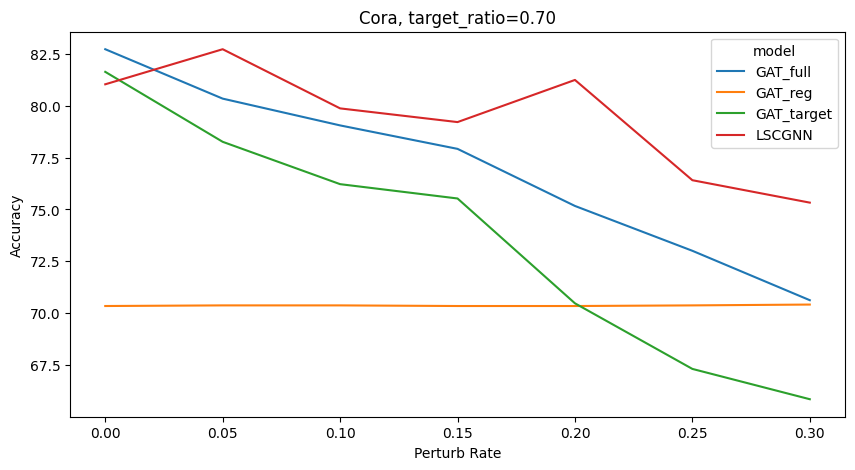

In [250]:

# plot accuracy_mean over perturb_rate
fig, ax = plt.subplots(figsize=(10, 5))
df_ablation_result.pivot(index='perturb_rate', columns='model', values='accuracy_mean').plot(ax=ax)
ax.set_xlabel('Perturb Rate')
ax.set_ylabel('Accuracy')
ax.set_title('Cora, target_ratio=0.70')

Text(0.5, 1.0, 'Cora, target_ratio=0.70')

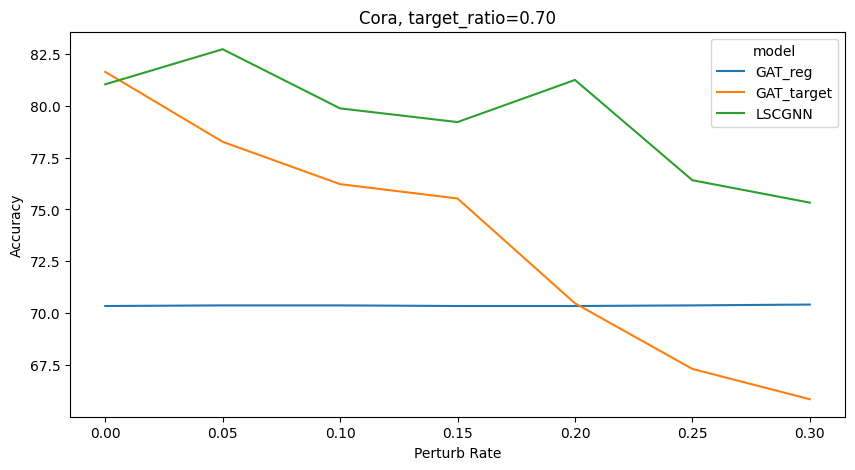

In [235]:
ax.set_ylabel('Accuracy')
ax.set_title('Cora, target_ratio=0.70')

ValueError: x and y must have same first dimension, but have shapes (5,) and (6,)

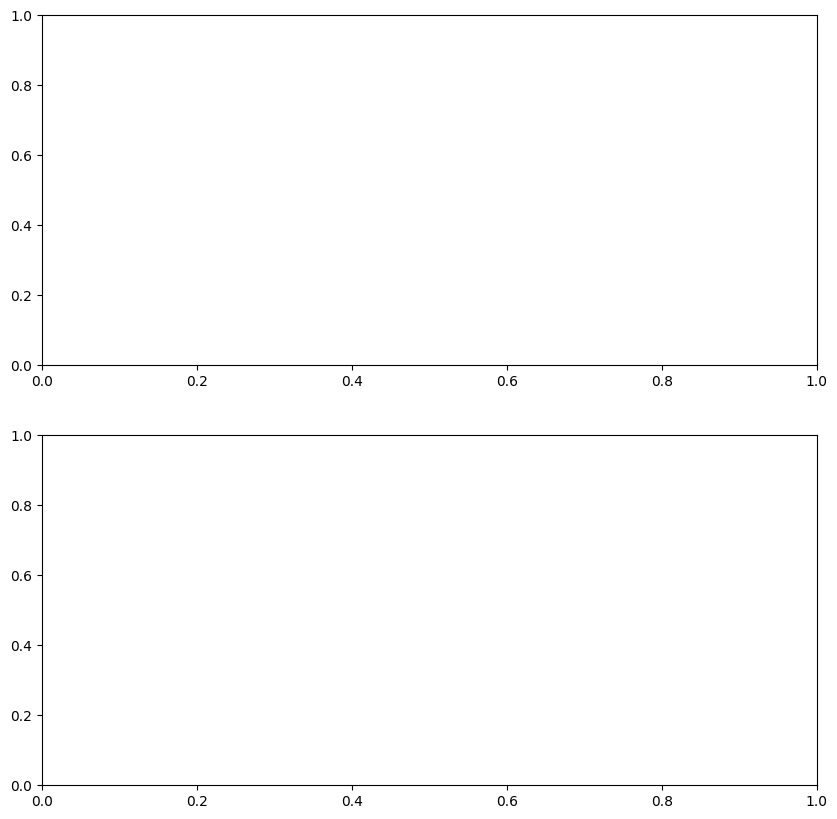

In [22]:
# plot for validation loss

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Define a list of markers
markers = ['o', 's', '^', '<', '>', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']

# Create a color map
colors = list(mcolors.TABLEAU_COLORS.keys())
split_ratios = df_agg['target_ratio'].unique()
color_map = {split_ratio: colors[i % len(colors)] for i, split_ratio in enumerate(split_ratios)}

# Create a marker map
false_pos_edge_ratios = df_agg['perturb_rate'].unique()
marker_map = {false_pos_edge_ratio: markers[i % len(markers)] for i, false_pos_edge_ratio in enumerate(false_pos_edge_ratios)}

# plot for different target_ratio and perturb_rate
for split_ratio in split_ratios:
    for false_pos_edge_ratio in false_pos_edge_ratios:
        df_current = df_agg[(df_agg['target_ratio'] == split_ratio) & (df_agg['perturb_rate'] == false_pos_edge_ratio)]
        # plot accuracy
        ax[0].plot([0, 1, 2, 3, 4, 5], df_current['val_best_loss_mean'],
                   label=f'target_ratio={split_ratio}, perturb_rate={false_pos_edge_ratio}',
                   marker=marker_map[false_pos_edge_ratio], color=color_map[split_ratio])
        # add error bar
        ax[0].set_xticks([0, 1, 2, 3, 4, 5])
        ax[0].grid(axis='y')
        ax[0].set_xticklabels(['0', '10', '100', '1e3', '1e4', '1e5'])
        ax[0].set_xlabel('Regularization')
        ax[0].set_title('accuracy')

# Create a custom legend
from matplotlib.lines import Line2D
# Create a custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker=marker_map[false_pos_edge_ratio], color='w', label=f'False Pos Edge Ratio={false_pos_edge_ratio}',
                          markerfacecolor='k', markersize=10) for false_pos_edge_ratio in false_pos_edge_ratios] + \
                  [Line2D([0], [0], color=color_map[split_ratio], lw=2, label=f'Split Ratio={split_ratio}') for split_ratio in split_ratios]
ax[0].legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))
ax[1].legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))

# save above plot as a figure
fig.savefig('figures/pubmed_accuracy_ap.png', bbox_inches='tight', dpi=300)

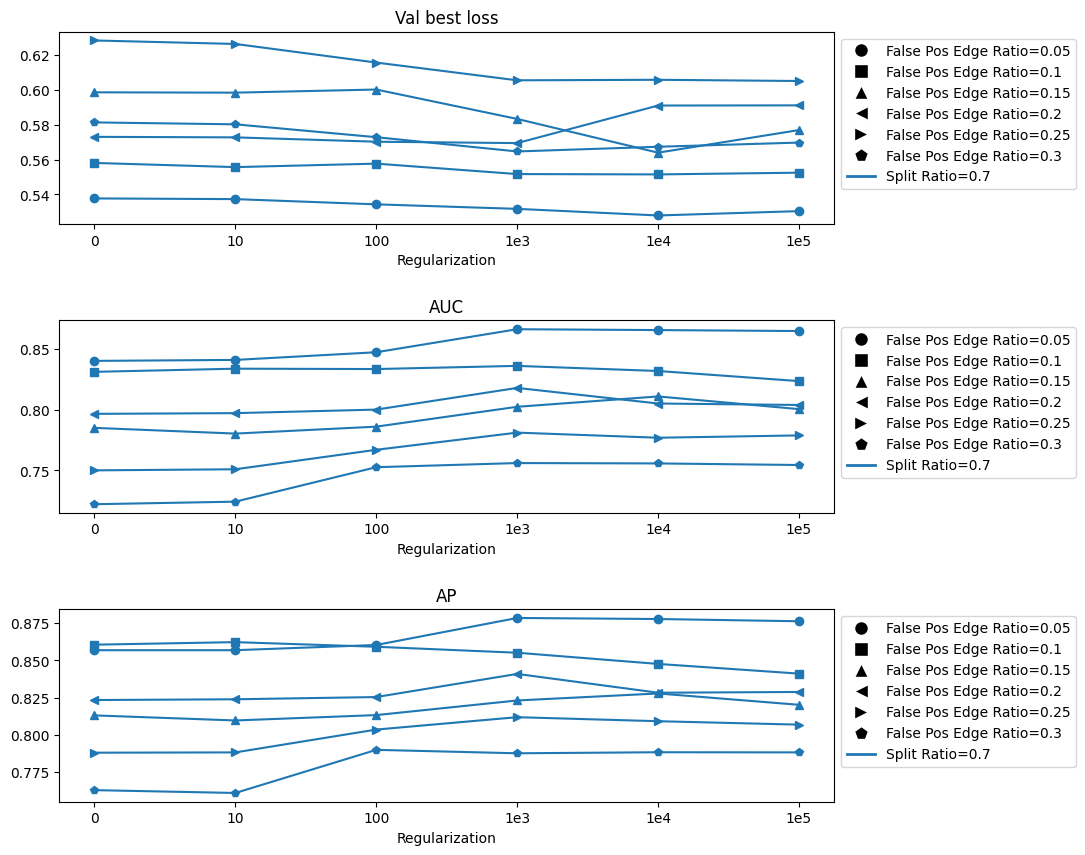

In [23]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D

fig, ax = plt.subplots(3, 1, figsize=(10, 10))

# Define markers and colors
markers = ['o', 's', '^', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']
colors = list(mcolors.TABLEAU_COLORS.keys())

split_ratios = df_agg['target_ratio'].unique()
false_pos_edge_ratios = df_agg['perturb_rate'].unique()

color_map = {split_ratio: colors[i % len(colors)] for i, split_ratio in enumerate(split_ratios)}
marker_map = {false_pos_edge_ratio: markers[i % len(markers)] for i, false_pos_edge_ratio in enumerate(false_pos_edge_ratios)}

# Plot for different target_ratio and perturb_rate
for split_ratio in split_ratios:
    for false_pos_edge_ratio in false_pos_edge_ratios:
        df_current = df_agg[(df_agg['target_ratio'] == split_ratio) & (df_agg['perturb_rate'] == false_pos_edge_ratio)]

        for i, metric in enumerate(['val_best_loss_mean', 'accuracy_mean', 'AP_mean']):
            ax[i].plot([0, 1, 2, 3, 4, 5], df_current[metric],
                       label=f'target_ratio={split_ratio}, perturb_rate={false_pos_edge_ratio}',
                       marker=marker_map[false_pos_edge_ratio], color=color_map[split_ratio])
            ax[i].set_xticks([0, 1, 2, 3, 4, 5])
            ax[i].set_xticklabels(['0', '10', '100', '1e3', '1e4', '1e5'])
            ax[i].set_xlabel('Regularization')
            ax[i].grid(axis='y')

        ax[0].set_title('Val best loss')
        ax[1].set_title('accuracy')
        ax[2].set_title('AP')

# Adjust space between plots
plt.subplots_adjust(hspace=0.5)

# Create a custom legend
legend_elements = [Line2D([0], [0], marker=marker_map[false_pos_edge_ratio], color='w', label=f'False Pos Edge Ratio={false_pos_edge_ratio}',
                          markerfacecolor='k', markersize=10) for false_pos_edge_ratio in false_pos_edge_ratios] + \
                  [Line2D([0], [0], color=color_map[split_ratio], lw=2, label=f'Split Ratio={split_ratio}') for split_ratio in split_ratios]
for a in ax:
    a.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))

# Save the plot as a figure
fig.savefig('figures/pubmed_accuracy_ap.png', bbox_inches='tight', dpi=300)

In [172]:

df_agg_current = df_agg[(df_agg['dataset'] == dataset) & (df_agg['target_ratio'] == split_ratio) & (df_agg['perturb_rate'] == false_pos_edge_ratio)]

# plot accuracy
ax[0].plot([0, 1, 2, 3, 4, 5],
           df_agg_current['accuracy']['mean'], label=f'{dataset}, split=0.5, false_pos_edge=0.5')
# ax[0].errorbar([0, 1, 2, 3, 4, 5],
#                df_agg[(df_agg['dataset'] == dataset)]['accuracy']['mean'],
#                yerr=df_agg[(df_agg['dataset'] == dataset)]['accuracy']['std'], fmt='o')
ax[0].set_xticks([0, 1, 2, 3, 4, 5])
ax[0].set_xticklabels(['0', '10', '100', '1e3', '1e4', '1e5'])
ax[0].set_xlabel('Regularization')
ax[0].set_title('accuracy')
ax[0].legend()

# plot AP
ax[1].plot([0, 1, 2, 3, 4, 5],
           df_agg_current['AP']['mean'], label=f'{dataset}, split=0.5, false_pos_edge=0.5')
ax[1].set_xticks([0, 1, 2, 3, 4, 5])
ax[1].set_xticklabels(['0', '10', '100', '1e3', '1e4', '1e5'])
ax[1].set_xlabel('Regularization')
ax[1].set_title('AP')
ax[1].legend()

TypeError: 'Axes' object is not subscriptable

In [ ]:
# plot execution time over different regularization
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot([0, 1, 2, 3, 4, 5], df_agg[(df_agg['dataset'] == dataset)]['execution_time']['mean'], label=f'{dataset}, split=0.5, false_pos_edge=0.5')
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_xticklabels(['0', '1', '10', '100', '1e3', '1e4'])
ax.set_xlabel('Regularization')
ax.set_ylabel('Execution Time in seconds')
ax.set_title('Execution Time')

In [ ]:
# plot execution time over different regularization
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot([0, 1, 2, 3, 4, 5], df_agg[(df_agg['dataset'] == dataset)]['best_epochs']['mean'], label=f'{dataset}, split=0.5, false_pos_edge=0.5')
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_xticklabels(['0', '1', '10', '100', '1e3', '1e4'])
ax.set_xlabel('Regularization')
ax.set_ylabel('Execution Time in seconds')
ax.set_title('Execution Time')